### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('population_total.xlsx')
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,315k,314k,314k,314k,313k,313k,312k,312k,311k,310k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,54.5M,54.4M,54.3M,54.1M,54M,53.8M,53.7M,53.5M,53.4M,53.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,79.8M,79.8M,79.7M,79.7M,79.6M,79.5M,79.5M,79.4M,79.3M,79.2M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,74.4M,75.2M,76M,76.8M,77.6M,78.4M,79.2M,80M,80.8M,81.5M


In [3]:
df = pd.melt(df , id_vars=['country'] , var_name='years' , value_name='population' )
df

,country,years,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [4]:
arr = np.array(df['population'].apply(lambda x: str(x)[-1] if str(x)[-1] not in [0,1,2,3,4,56,7,8,9] else x ))
arr

array(['M', 'M', 'k', ..., 'M', 'M', 'M'], dtype=object)

In [5]:
# we have B M K only
np.unique(arr)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'B', 'M', 'k'],
      dtype=object)

In [6]:
def remove_B_M_K(val):
    if 'k' in val:
        return float(val.replace('k', '')) * 1000
    elif 'M' in val:
        return float(val.replace('M', '')) * 1000000
    elif 'B' in val:
        return float(val.replace('B', '')) * 1000000000
    else:
        return float(val)

df['population'] = df['population'].astype('str').apply(remove_B_M_K)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     59297 non-null  object 
 1   years       59297 non-null  object 
 2   population  59297 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [18]:
df['years'] = df['years'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     59297 non-null  object 
 1   years       59297 non-null  int32  
 2   population  59297 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ MB


### What is the highest 10 countires in population in 2024?

In [20]:
top10 = df[df['years']==2024].sort_values(by='population' , ascending=False)[:10]

In [22]:
top10

,country,years,population
44160,China,2024,1.460000e+09
44207,India,2024,1.430000e+09
44314,United States,2024,3.390000e+08
44206,Indonesia,2024,2.840000e+08
44264,Pakistan,2024,2.380000e+08
44256,Nigeria,2024,2.280000e+08
44151,Brazil,2024,2.180000e+08
44143,Bangladesh,2024,1.710000e+08
44277,Russia,2024,1.450000e+08
44241,Mexico,2024,1.340000e+08


<Axes: xlabel='population', ylabel='country'>

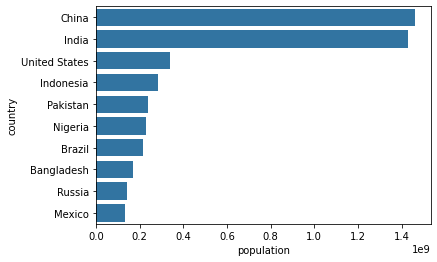

In [24]:
sns.barplot(data=top10 , x='population' , y='country')

- ### China and India is the highest population in the world

### what is the population in Egypt over 2000 to 2024?

In [30]:
egypt = df[(df['years']>=2000) & (df['years']<=2024) & (df['country']=='Egypt') ]
egypt

,country,years,population
39451,Egypt,2000,68800000.0
39648,Egypt,2001,70200000.0
39845,Egypt,2002,71500000.0
40042,Egypt,2003,72800000.0
40239,Egypt,2004,74200000.0
40436,Egypt,2005,75500000.0
40633,Egypt,2006,76900000.0
40830,Egypt,2007,78200000.0
41027,Egypt,2008,79600000.0
41224,Egypt,2009,81100000.0


<Axes: xlabel='years', ylabel='population'>

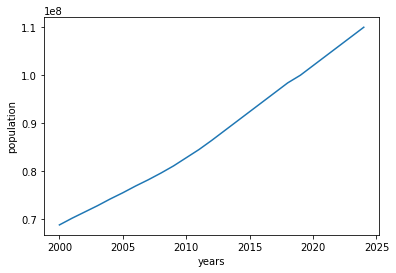

In [31]:
sns.lineplot(data=egypt , x='years' , y='population')

- ### from 2000 to 2024 the population increases almost linearly 